In [1]:
#Get the data
from pandas_datareader import data as data_reader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Get the close data for given ticker for a given range
def get_close_data( tickers : list, start_date = '2015-01-01', end_date = '2018-12-31' ):
    complete_data = data_reader.DataReader(tickers, 'yahoo', start_date, end_date);
    #get the close data
    close_data = complete_data['Close'];
    #get all the weekdays - we might not have data for some of the days so we will need to refill it
    all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
    close_data = close_data.reindex(all_weekdays) #re-index
    close_data = close_data.fillna(method='ffill') #fill NaNs with last seen
    return close_data;

In [2]:
start_date = '2015-01-01'
end_date = '2018-12-31'
tickers = [ 'GOOGL', 'AAPL', 'MSFT' ];
all_data = get_close_data( tickers, start_date, end_date );

In [3]:
#let's see how the data looks like
all_data.describe()

Symbols,GOOGL,AAPL,MSFT
count,1042.000000,1042.000000,1042.000000
mean,860.727812,140.928225,68.717390
std,200.743272,35.005374,21.566365
min,497.059998,90.339996,40.290001
25%,724.395004,112.055000,51.315000
50%,820.160004,129.360001,62.690001
75%,1041.529999,168.795006,85.919998
max,1285.500000,232.070007,115.610001


### Interesting to see big difference between minimum and maximum values of stock prices over the period of 4 years we chose!

/Users/gursharan/.virtualenvs/ds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


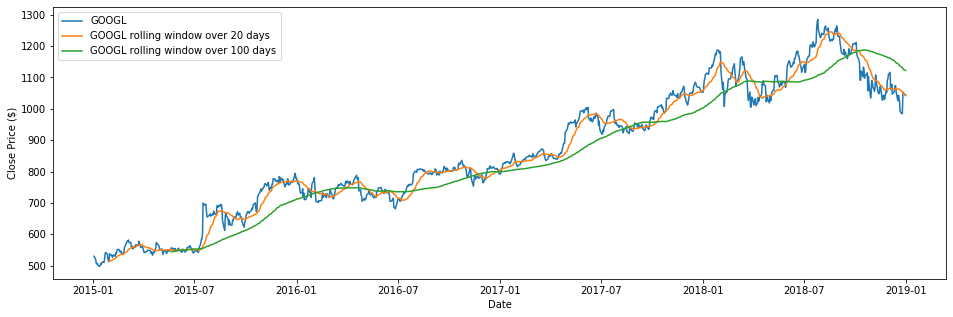

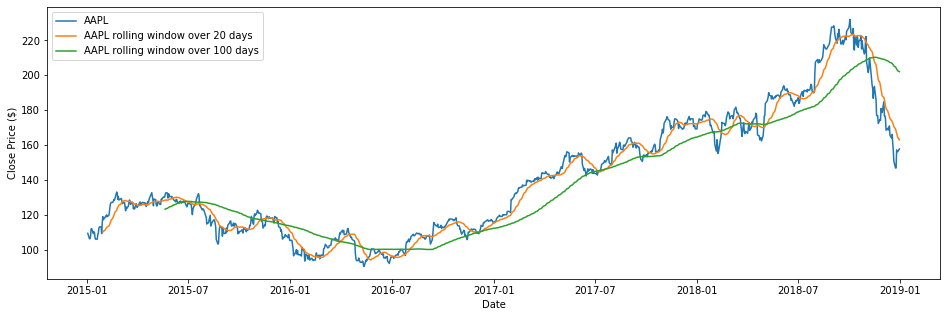

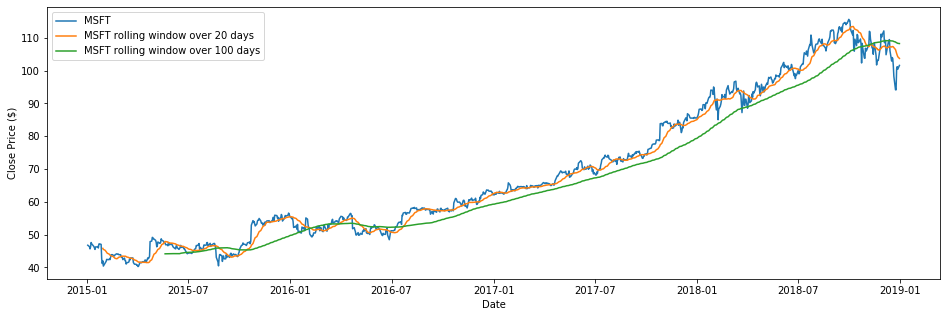

In [4]:
for ticker in tickers:
    time_series = all_data.loc[:, ticker]
    
    rolling_window_20 = time_series.rolling(window=20).mean()
    rolling_window_100 = time_series.rolling(window=100).mean()
    
    _, ax = plt.subplots(figsize=(16,5))

    ax.plot(time_series.index, time_series, label=ticker)
    ax.plot(rolling_window_20.index, rolling_window_20, label= ticker + ' rolling window over 20 days')
    ax.plot(rolling_window_100.index, rolling_window_100, label= ticker +' rolling window over 100 days')

    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price ($)')
    ax.legend()

### How do you assess a trading strategy ? We can check the returns of asset. One method to measure it is relative percentage returns and another is log returns. Latter is used more frequently in calculating assets returns, one reason being easiness in calculation given additive property of log returns. However relative percentage returns are more intuitive - for example 100% ( i.e. 1 ) relative return means the asset value doubled! However log return value of 1 doesn't mean that.

In [5]:
relative_returns = all_data.pct_change(periods=1);
relative_returns.head(7)[2:] #relative percentage returns

Symbols,GOOGL,AAPL,MSFT
2015-01-05,-0.019054,-0.028172,-0.009196
2015-01-06,-0.024679,0.000094,-0.014677
2015-01-07,-0.002941,0.014022,0.012705
2015-01-08,0.003484,0.038422,0.029418
2015-01-09,-0.012211,0.001073,-0.008405


In [6]:
log_returns = np.log(all_data).diff();
log_returns.head(7)[2:] #log returns - difference between log of values 

Symbols,GOOGL,AAPL,MSFT
2015-01-05,-0.019238,-0.028576,-0.009238
2015-01-06,-0.024989,0.000094,-0.014786
2015-01-07,-0.002945,0.013925,0.012625
2015-01-08,0.003478,0.037703,0.028994
2015-01-09,-0.012286,0.001072,-0.008441


### For small changes in values, we see that log returns is very close to the relative percentage returns! This does come from taylor expansion ln( 1 + x ) ~= x for very small values of x. This can be seen in above tables as well! Having log returns also make it super easy to calculate cumulative returns as well - all we need to do is add the values!

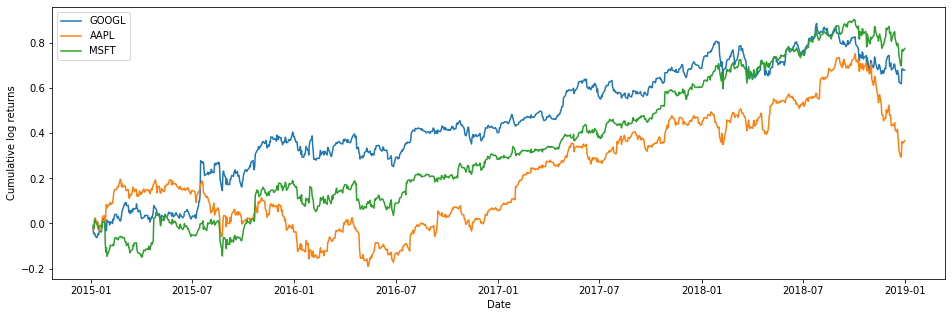

In [7]:
_, ax = plt.subplots(1, 1, figsize=(16,5))
for c in log_returns:
    ax.plot(log_returns.index, log_returns[c].cumsum() #sums till current entry, ignoring NaNs
            , label=str(c))
ax.set_ylabel('Cumulative log returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()

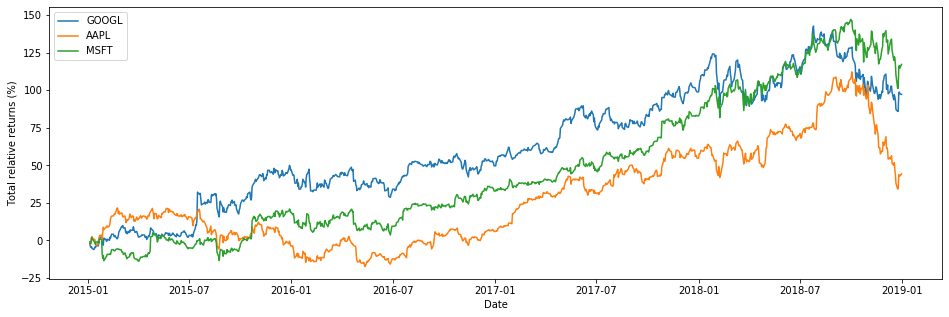

In [8]:
_, ax = plt.subplots(1, 1, figsize=(16,5))
for c in log_returns:
    ax.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), #cumulative relative % returns
            label=str(c))
ax.set_ylabel('Total relative returns (%)')
ax.set_xlabel('Date')
ax.legend()
plt.show()

### Looking at the above graph, if we had bought microsoft stock in 2015, we would have 100% profit by 2018! Almost similar numbers for other stocks as well